# Plot progeny composition

- We trained an SVM with the morphological descriptors of all the founders
- With it, we labeled all progeny based on their grain morphology
- We visualize how the progeny is distributed according to shape

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(viridis))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(reshape2))
suppressPackageStartupMessages(library(dplyr))

In [5]:
setwd('~/documents/barley_stacks/preproc/progeny/unsupervised')

In [6]:
founders <- read.csv('../../../corrected_metadata.csv')
founders_names_original <- sort(unique(founders$Founder))[-1]
#founders_names_original <- levels(unique(founders$Founder))[-1]
founders_names <- founders_names_original
founders_names[5] <- 'CA Mariout'
founders_names[11] <- 'Good Delta'
founders_names[17] <- 'Maison Carree'
founders_names[24] <- 'Palmella Blue'
founders_names[28] <- 'WI Winter'
print(founders_names)

#colors <- rep(rev(RColorBrewer::brewer.pal(12, 'Paired')),3)[1:length(founders_names)]
colors <- c(brewer.pal(12, 'Paired'), brewer.pal(8, 'Set2'), brewer.pal(8,'Dark2'))

 [1] "Algerian"        "Alpha"           "Arequipa"        "Atlas"          
 [5] "CA Mariout"      "Club Mariout"    "Everest"         "Flynn"          
 [9] "Glabron"         "Golden Pheasant" "Good Delta"      "Han River"      
[13] "Hannchen"        "Horn"            "Lion"            "Lyallpur"       
[17] "Maison Carree"   "Manchuria"       "Meloy"           "Minia"          
[21] "Multan"          "Oderbrucker"     "Orel"            "Palmella Blue"  
[25] "Sandrel"         "Trebi"           "White Smyrna"    "WI Winter"      


In [59]:
colors <- c('#000000','#E69F00','#52ADE0','#009E73',
            '#F0E442','#0072B2','#D55E00','#CC79A7',
            '#902C54','#00ECFF')
colors <- rep(colors,3)

[1] "#000000" "#E69F00" "#52ADE0" "#009E73" "#F0E442" "#0072B2" "#D55E00"
 [8] "#CC79A7" "#902C54" "#00ECFF" "#000000" "#E69F00" "#52ADE0" "#009E73"
[15] "#F0E442" "#0072B2" "#D55E00" "#CC79A7" "#902C54" "#00ECFF" "#000000"
[22] "#E69F00" "#52ADE0" "#009E73" "#F0E442" "#0072B2" "#D55E00" "#CC79A7"
[29] "#902C54" "#00ECFF"

In [13]:
# gen7_svm_combined_d158_T16_toposcaled.csv
gen <- 7
genn <- 58
d <- 158
TT <- 16

info_type <- 'combined'
scaled <- 'topounscaled'

filename <- paste('gen', gen, '_svm_', info_type, '_d', d,'_T',TT,'_',scaled,'.csv', sep='')
progeny <- read.csv(filename)

In [60]:
counts <- matrix(0, ncol=3, nrow=length(founders_names))
rownames(counts) <- founders_names_original

for(i in 1:length(founders_names_original))
    counts[i,1] = sum(progeny$Founder == founders_names_original[i])

counts[,2] <- (counts[,1]/dim(progeny)[1]*100)
ordered <- counts[base::order(counts[,1], decreasing=TRUE),]
ordered[,3] <- base::cumsum(ordered[,2])
rownames(ordered) <- founders_names[rank(rownames(ordered))]
df <- as.data.frame(ordered)
df$Line <- rownames(df)
df$Line <- factor(df$Line, levels=df$Line[1:nrow(df)])
#df
#genotypes <- df[df$V2 > 1,'Line']
genotypes <- levels(df$Line)

In [64]:
rank(genotypes)

[1] 17  4  5  6 26 20 10  1  2  3 14 24  8 28 16 15 22 23 19 21 12 11 25 18 13
[26] 27  7  9

In [70]:
order(genotypes)

[1]  8  9 10  2  3  4 27 13 28  7 22 21 25 11 16 15  1 24 19  6 20 17 18 12 23
[26]  5 26 14

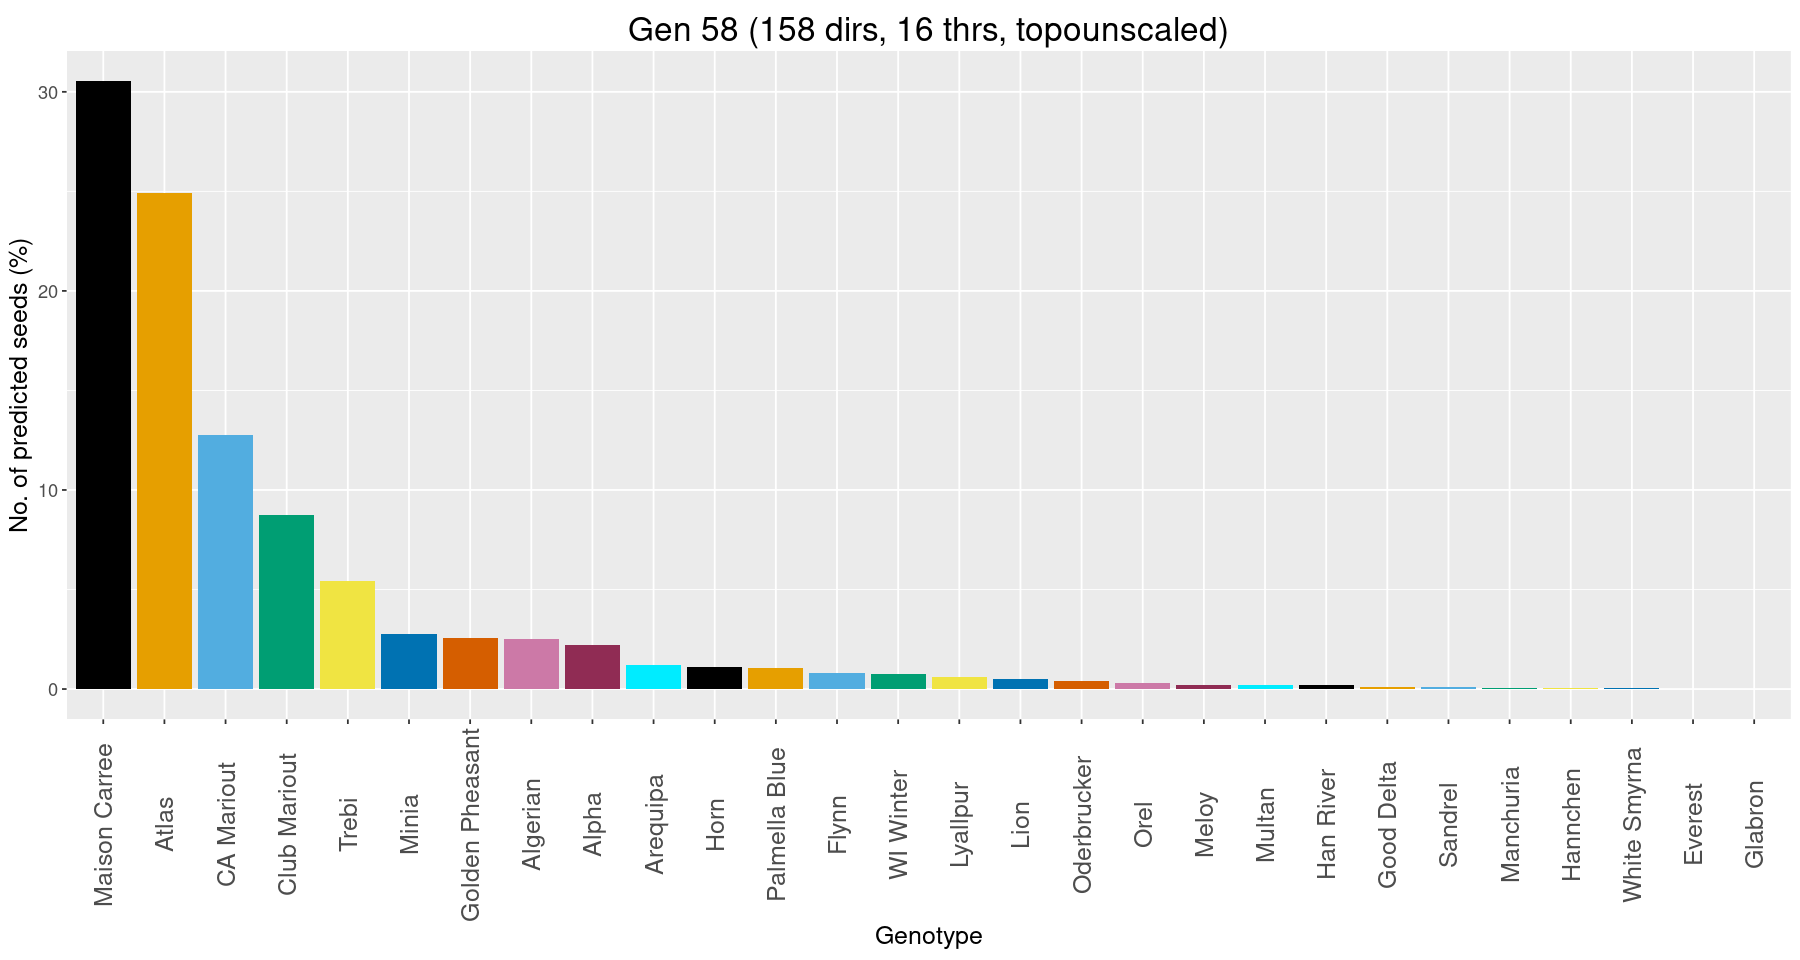

In [67]:
options(repr.plot.width=15, repr.plot.height=8)

titlename <- paste('Gen ', genn, ' (', d,' dirs, ', TT, ' thrs, ', scaled,')', sep='')

p <- ggplot2::ggplot(df, aes(x=Line, y=V2)) + 
     geom_bar(aes(fill=Line), stat='identity') +
     scale_fill_manual(values = colors) +
     #viridis::scale_fill_viridis(discrete=TRUE, option='A')  +
       theme(plot.title = element_text(hjust = 0.5, vjust = 0, size=20),
            axis.text.x = element_text(size = 15, hjust = 0.5, vjust=0.5, angle=90),
            axis.text.y = element_text(size = 11),
            axis.title = element_text(size=15),
            legend.position = 'none') +
      ylab('No. of predicted seeds (%)') +
      ggtitle(titlename) +
      xlab('Genotype') 
p

In [42]:
w <- 8
h <- 9

filename <- paste('histogram_umap_gen',gen,'_d',d,'_T',TT,'_',scaled,'_vert',sep='')
ggplot2::ggsave(paste(filename, '.pdf', sep=''), plot=p, device='pdf', width=w, height=h)
ggplot2::ggsave(paste(filename, '.png', sep=''), plot=p, device='png', width=8, height=9)

In [41]:
w <- 12
h <- 6

filename <- paste('histogram_umap_gen',gen,'_d',d,'_T',TT,'_',scaled,'_horz',sep='')
ggplot2::ggsave(paste(filename, '.pdf', sep=''), plot=p, device='pdf', width=w, height=h)
ggplot2::ggsave(paste(filename, '.png', sep=''), plot=p, device='png', width=w, height=h)

## Individual lines

In [54]:
typeof(genotypes)

[1] "character"

In [43]:
selection <- sort(unique(progeny$Selection))
counts <- matrix(0, nrow=length(selection), ncol=length(genotypes))

for(i in 1:nrow(counts)){
    foo <- progeny[progeny$Selection == selection[i], ]
    for(j in 1:ncol(counts)){
        counts[i,j] <- (sum(foo$Founder == genotypes[j])/nrow(foo)*100)
    }
}

dg <- as.data.frame(counts)
colnames(dg) <- genotypes
rownames(dg) <- selection
dg$Selection <- rownames(dg)

In [44]:
dga <- dplyr::arrange(dg, desc(data.frame(base::rowSums(dg[genotypes[1:3]]))))
dga$Selection <- factor(dga$Selection, levels=dga$Selection[1:nrow(dga)])

In [45]:
dgm <- reshape2::melt(dga, id.vars='Selection', variable.name='Line', value.name='Percentage')

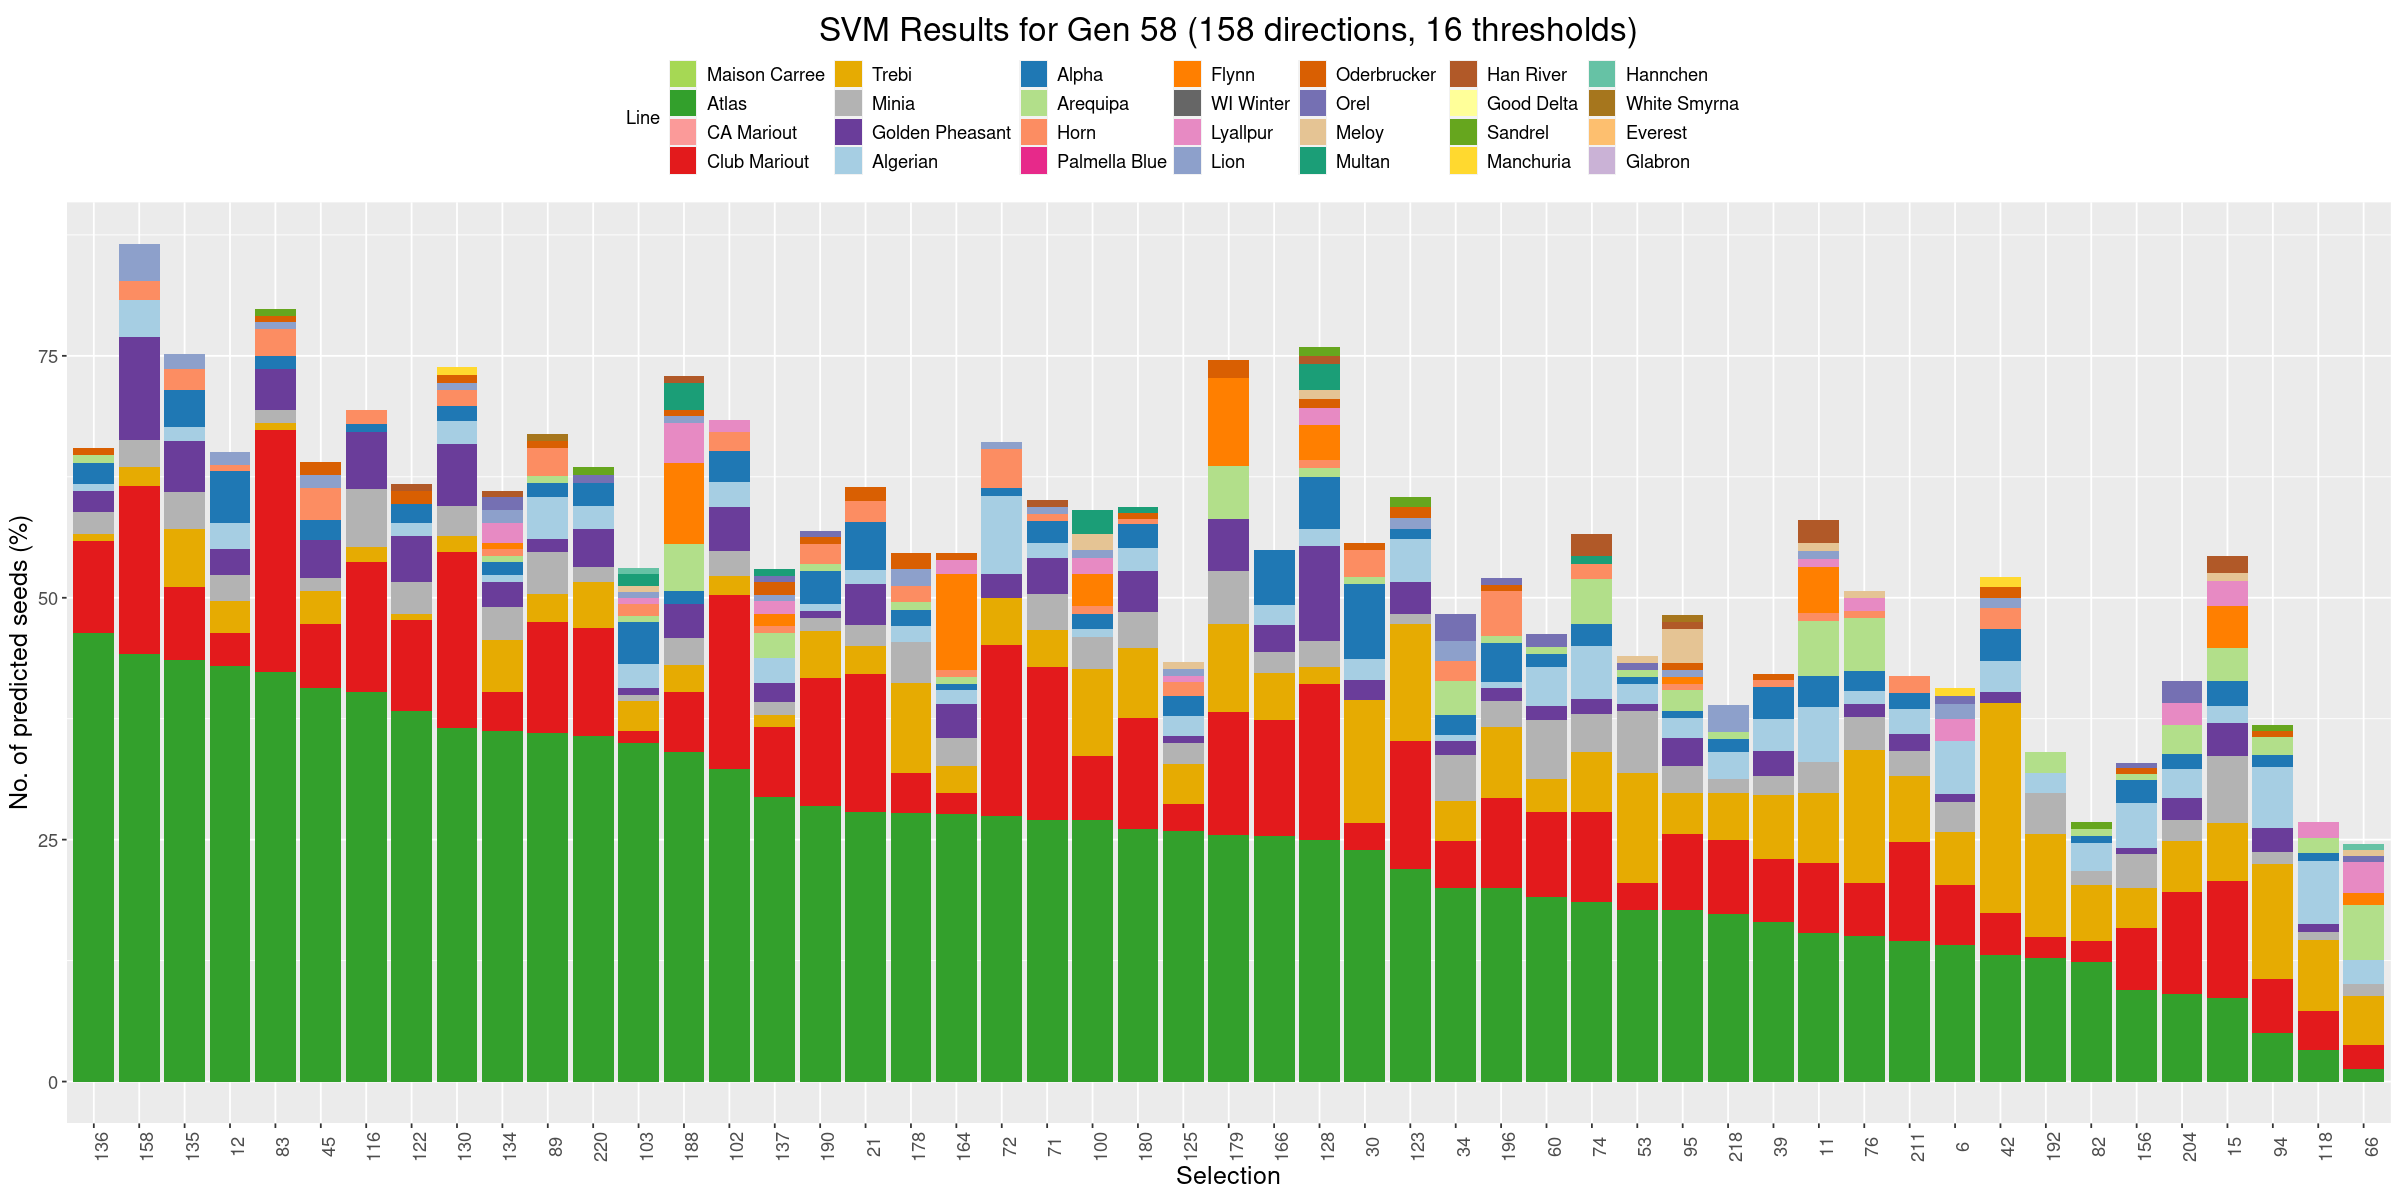

In [46]:
options(repr.plot.width=20, repr.plot.height=10)

titlename <- paste('SVM Results for Gen ', genn, ' (',d,' directions, ', TT, ' thresholds)', sep='')
ttitlename <- paste('-          ', titlename, '            -')

p <- ggplot(dgm, aes(x=Selection, y=Percentage)) +
     geom_col(aes(fill=Line), position = position_stack(reverse = TRUE))+
     scale_fill_manual(values = colors[rank(genotypes)], guide = guide_legend(ncol = 9)) +
     theme(plot.title = element_text(hjust = 0.5, vjust = 0, size=20),
            axis.text.x = element_text(size = 11, angle=90),
            axis.text.y = element_text(size = 11),
            axis.title = element_text(size=15),
            legend.text = element_text(size=11),
            legend.position = "top"
            ) +
      ylab('No. of predicted seeds (%)') +
      ggtitle(titlename) +
      xlab('Selection') 
      #guides(col = guide_legend(ncol = 8))
p

In [155]:
filename <- paste('selection_umap_gen',gen,'_d',d,'_T',TT,sep='')
ggplot2::ggsave(paste(filename, '.pdf', sep=''), plot=p, device='pdf', width=14, height=8)
ggplot2::ggsave(paste(filename, '.png', sep=''), plot=p, device='png', width=14, height=8)